In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Timeseries OHLC.csv to Timeseries OHLC.csv


In [23]:
ohlc=pd.read_csv("Timeseries OHLC.csv")
ohlc.head(36)

,OPEN,HIGH,LOW,CLOSE,OPEN_LAG1,HIGH_LAG1,LOW_LAG1,CLOSE_LAG1,OPEN_LAG2,HIGH_LAG2,...,DAYOFMONTH,DAYOFWEEK,DAYOFYEAR,MONTH,DIFF_LAG1_OPEN,DIFF_LAG1_HIGH,DIFF_LAG1_LOW,DIFF_LAG1_CLOSE,TARGET_CLOSE,TARGET_OPEN
0,1.18025,1.19050,1.17920,1.18641,1.17617,1.18063,1.17213,1.18027,1.17708,1.17967,...,5.0,3.0,217.0,8.0,0.00408,0.00987,0.00707,0.00614,1.18768,1.18627
1,1.18627,1.19162,1.18179,1.18768,1.18025,1.19050,1.17920,1.18641,1.17617,1.18063,...,6.0,4.0,218.0,8.0,0.00602,0.00112,0.00259,0.00127,1.17855,1.18762
2,1.18762,1.18831,1.17553,1.17855,1.18627,1.19162,1.18179,1.18768,1.18025,1.19050,...,7.0,5.0,219.0,8.0,0.00135,-0.00331,-0.00626,-0.00913,1.17365,1.17869
3,1.17869,1.18007,1.17360,1.17365,1.18762,1.18831,1.17553,1.17855,1.18627,1.19162,...,10.0,1.0,222.0,8.0,-0.00893,-0.00824,-0.00193,-0.00490,1.17394,1.17365
4,1.17365,1.18080,1.17220,1.17394,1.17869,1.18007,1.17360,1.17365,1.18762,1.18831,...,11.0,2.0,223.0,8.0,-0.00504,0.00073,-0.00140,0.00029,1.17853,1.17398
5,1.17398,1.18171,1.17111,1.17853,1.17365,1.18080,1.17220,1.17394,1.17869,1.18007,...,12.0,3.0,224.0,8.0,0.00033,0.00091,-0.00109,0.00459,1.18145,1.17839
6,1.17839,1.18642,1.17776,1.18145,1.17398,1.18171,1.17111,1.17853,1.17365,1.18080,...,13.0,4.0,225.0,8.0,0.00441,0.00471,0.00665,0.00292,1.18414,1.18125
7,1.18125,1.18504,1.17817,1.18414,1.17839,1.18642,1.17776,1.18145,1.17398,1.18171,...,14.0,5.0,226.0,8.0,0.00286,-0.00138,0.00041,0.00269,1.18701,1.18384
8,1.18384,1.18810,1.18281,1.18701,1.18125,1.18504,1.17817,1.18414,1.17839,1.18642,...,17.0,1.0,229.0,8.0,0.00259,0.00306,0.00464,0.00287,1.19313,1.18666
9,1.18666,1.19657,1.18611,1.19313,1.18384,1.18810,1.18281,1.18701,1.18125,1.18504,...,18.0,2.0,230.0,8.0,0.00282,0.00847,0.00330,0.00612,1.18392,1.19310


In [4]:
ohlc.columns

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'OPEN_LAG1', 'HIGH_LAG1', 'LOW_LAG1',
       'CLOSE_LAG1', 'OPEN_LAG2', 'HIGH_LAG2', 'LOW_LAG2', 'CLOSE_LAG2',
       'OPEN_LAG3', 'HIGH_LAG3', 'LOW_LAG3', 'CLOSE_LAG3', '30DAY_SMA',
       '7DAY_STDDEV', 'DAYOFMONTH', 'DAYOFWEEK', 'DAYOFYEAR', 'MONTH',
       'DIFF_LAG1_OPEN', 'DIFF_LAG1_HIGH', 'DIFF_LAG1_LOW', 'DIFF_LAG1_CLOSE',
       'TARGET_CLOSE', 'TARGET_OPEN'],
      dtype='object')

In [5]:
ohlc.isnull().sum()

,0
OPEN,0
HIGH,0
LOW,0
CLOSE,0
OPEN_LAG1,0
HIGH_LAG1,0
LOW_LAG1,0
CLOSE_LAG1,0
OPEN_LAG2,0
HIGH_LAG2,0


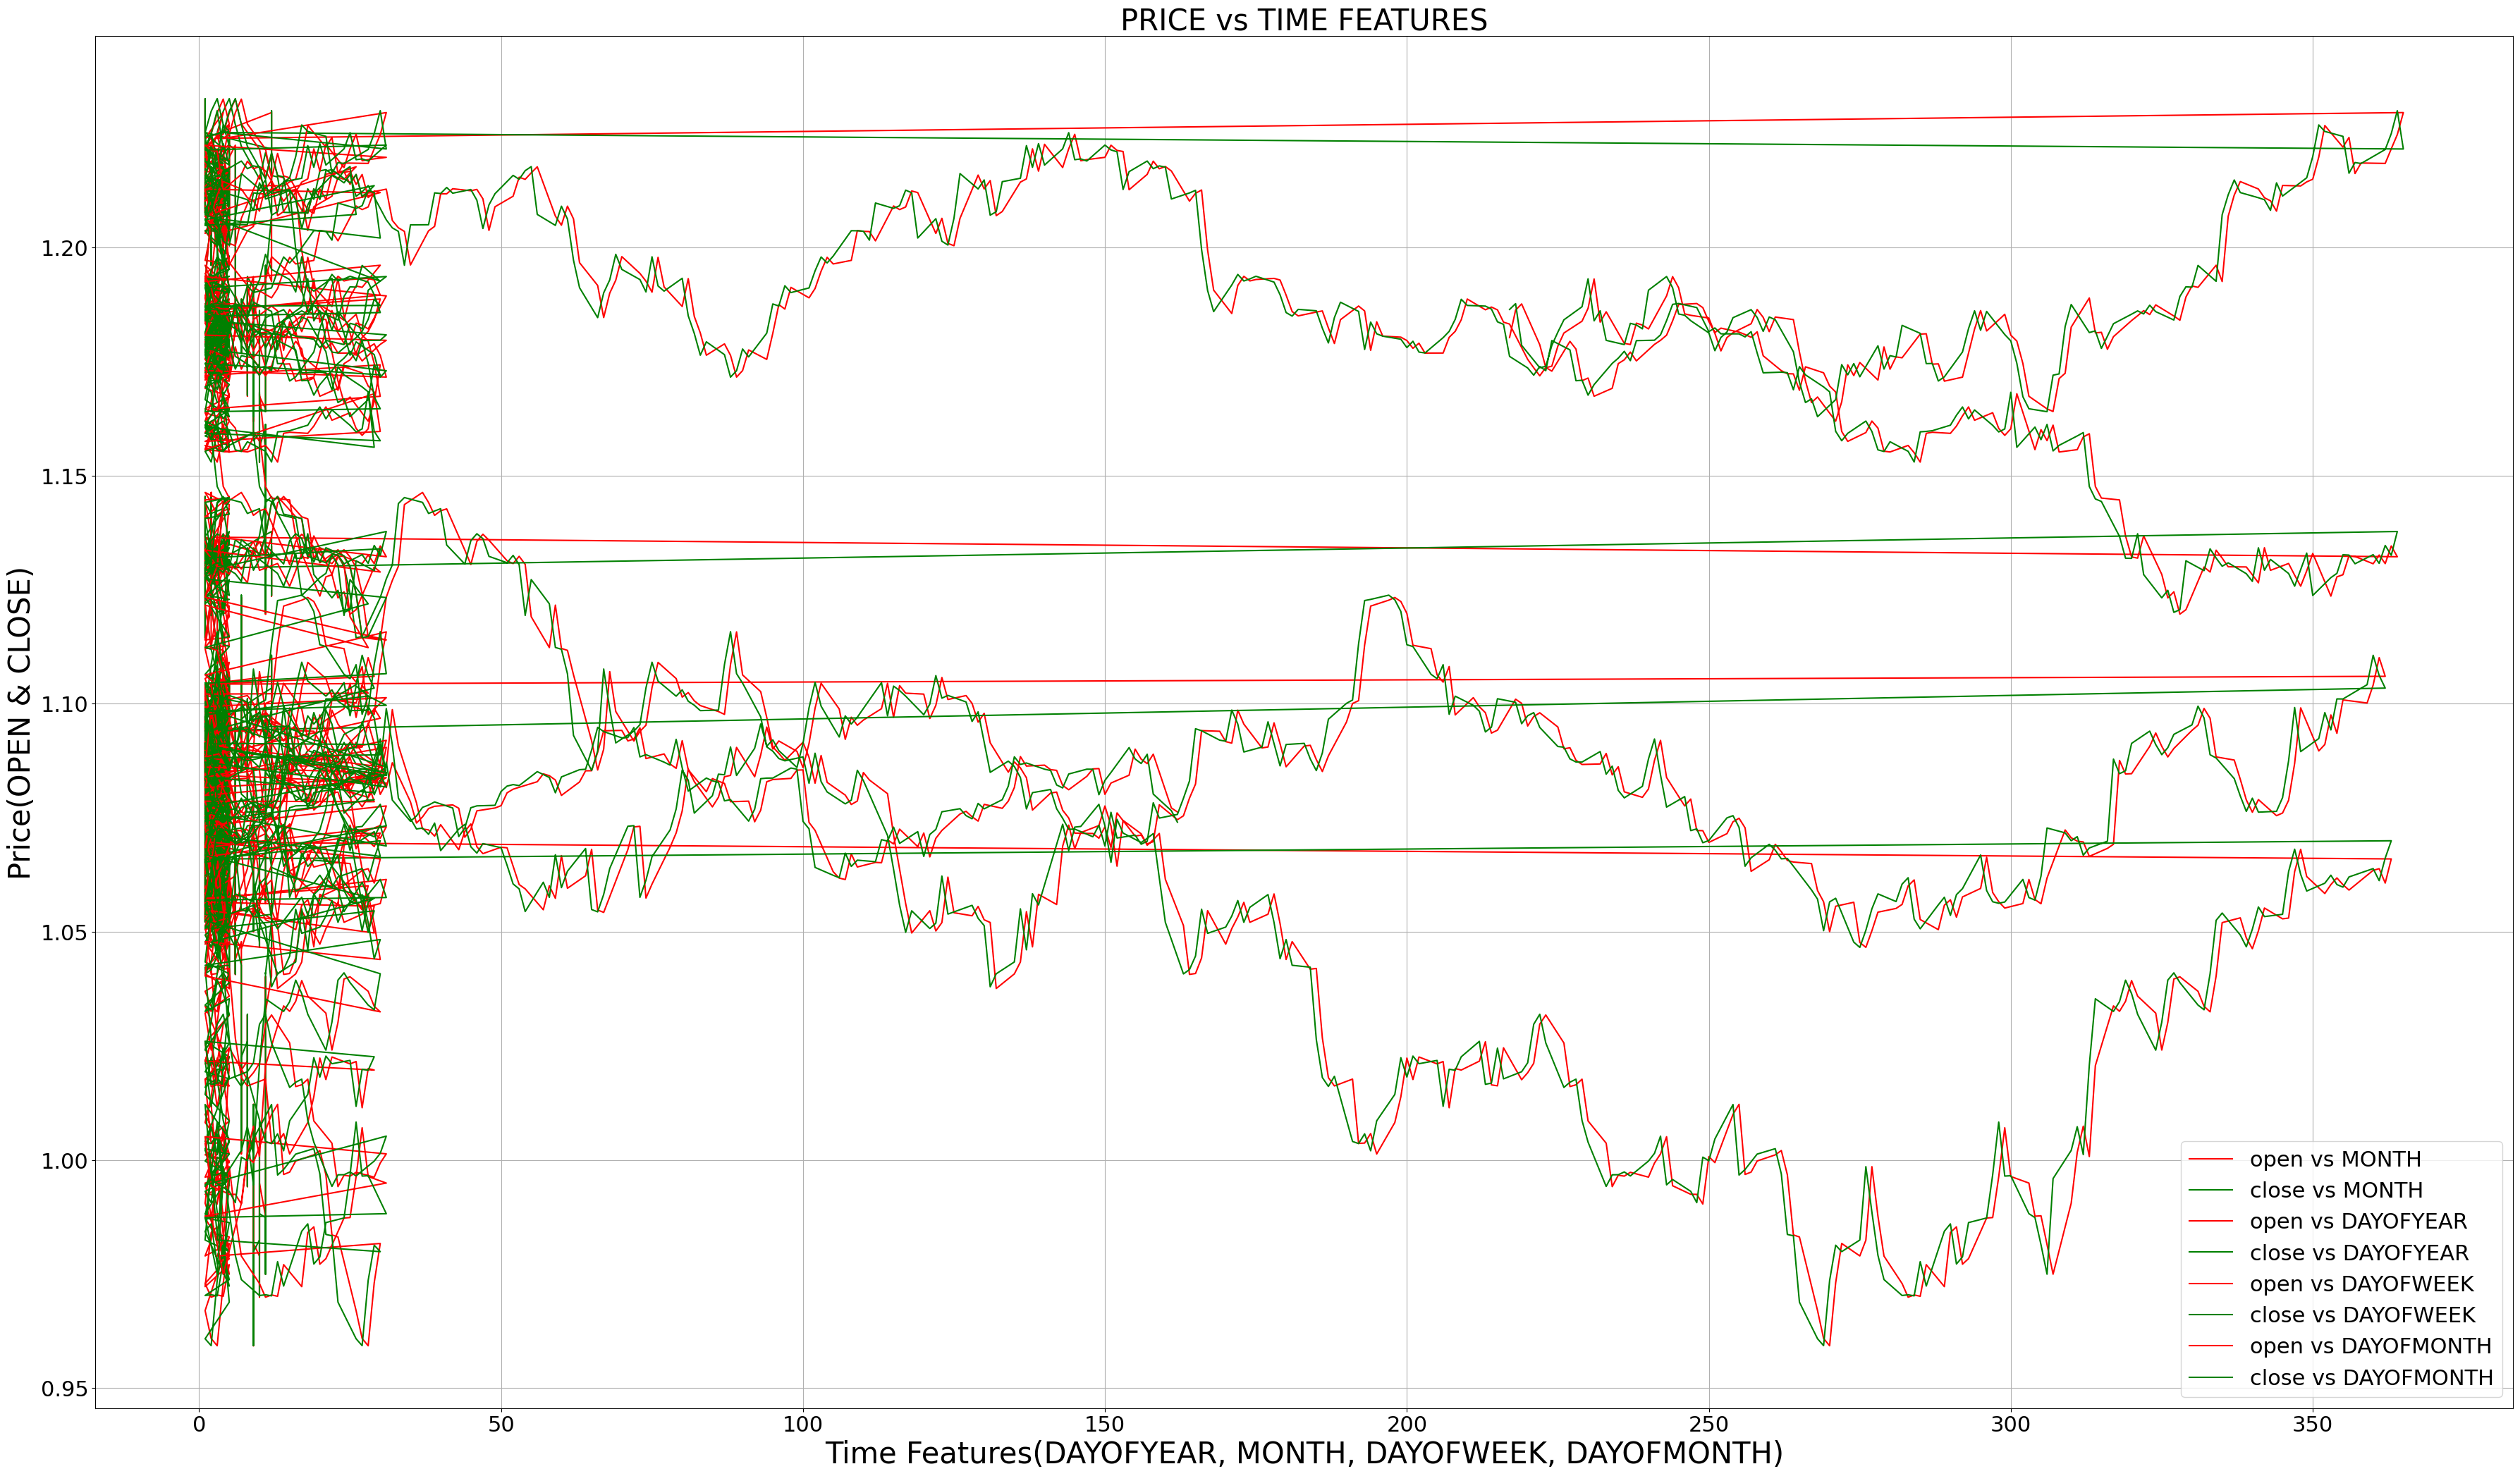

In [24]:
#Timeseries plot
Time_features = ['MONTH', 'DAYOFYEAR','DAYOFWEEK', 'DAYOFMONTH']
plt.figure(figsize=(35, 20))

for feature in Time_features:
    plt.plot(ohlc[feature], ohlc['OPEN'], label='open vs '+ str(feature), color='red')
    plt.plot(ohlc[feature], ohlc['CLOSE'], label='close vs '+ str(feature), color='green')

plt.grid(True)
plt.tight_layout()
plt.title('PRICE vs TIME FEATURES', fontsize=30)
plt.xlabel('Time Features(DAYOFYEAR, MONTH, DAYOFWEEK, DAYOFMONTH)', fontsize=30)
plt.ylabel('Price(OPEN & CLOSE)', fontsize=30)
plt.legend(fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

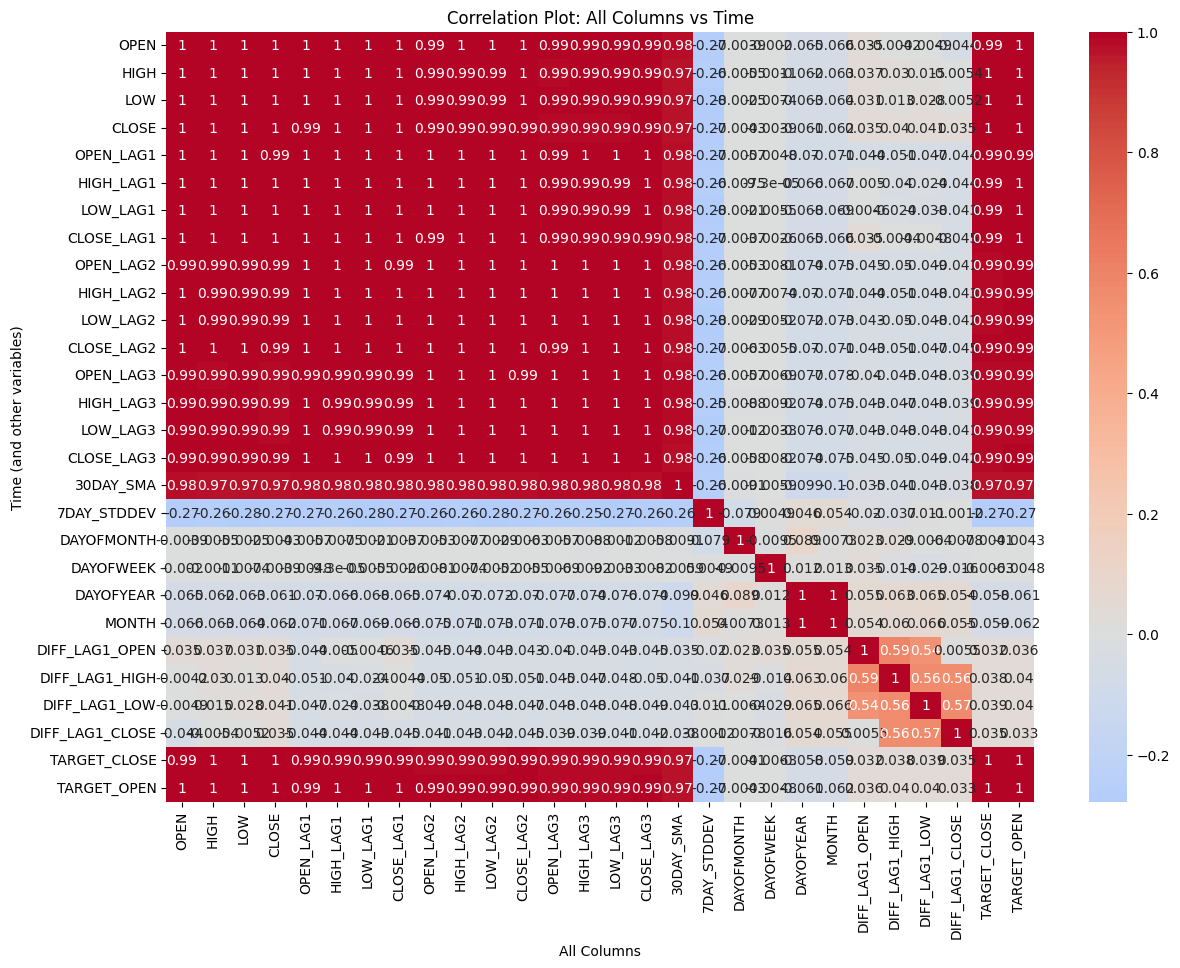

In [8]:
#Correlation plot
corr = ohlc.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Plot: All Columns vs Time')
plt.xlabel('All Columns')
plt.ylabel('Time (and other variables)')
plt.show()

In [9]:
# Creating a new Target column(target variable= Next price direction): 1 if price goes up, 0 if price goes down
ohlc['TARGET'] = (ohlc['TARGET_CLOSE'] > ohlc['CLOSE']).astype(int)
ohlc['TARGET'].head()


,TARGET
0,1
1,0
2,0
3,1
4,1


In [10]:
ohlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OPEN             1000 non-null   float64
 1   HIGH             1000 non-null   float64
 2   LOW              1000 non-null   float64
 3   CLOSE            1000 non-null   float64
 4   OPEN_LAG1        1000 non-null   float64
 5   HIGH_LAG1        1000 non-null   float64
 6   LOW_LAG1         1000 non-null   float64
 7   CLOSE_LAG1       1000 non-null   float64
 8   OPEN_LAG2        1000 non-null   float64
 9   HIGH_LAG2        1000 non-null   float64
 10  LOW_LAG2         1000 non-null   float64
 11  CLOSE_LAG2       1000 non-null   float64
 12  OPEN_LAG3        1000 non-null   float64
 13  HIGH_LAG3        1000 non-null   float64
 14  LOW_LAG3         1000 non-null   float64
 15  CLOSE_LAG3       1000 non-null   float64
 16  30DAY_SMA        1000 non-null   float64
 17  7DAY_STDDEV    

In [11]:
# Preparing data for modeling
X = ohlc.drop(['TARGET', 'TARGET_CLOSE', 'TARGET_OPEN'],axis=1)
Y = ohlc['TARGET']

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (600, 26) (600,)
Testing set shape: (400, 26) (400,)


In [13]:
# Initializing
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Training the model
lr_model.fit(X_train, Y_train)

Y_pred = lr_model.predict(X_test)
print("working")

working


In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.5000


In [18]:
correct_predictions = (Y_pred == Y_test).sum()
incorrect_predictions = (Y_pred != Y_test).sum()
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")

Correct Predictions: 200
Incorrect Predictions: 200


In [20]:
from sklearn.metrics import classification_report

class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.53      0.38      0.44       210
           1       0.48      0.64      0.55       190

    accuracy                           0.50       400
   macro avg       0.51      0.51      0.49       400
weighted avg       0.51      0.50      0.49       400

